In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from pathlib import Path
from matplotlib import colormaps #type: ignore

task = 'wnli'
epochs = 3

cmp = 'viridis'
sv = bool(0)
dpi = 300
transparent = False


print(os.getcwd())
pth = f'c:/Ebooks/code/Research/Tasks/stitch/{task}'
pth = os.path.join(os.getcwd(), pth)
if sv:
    Path(pth).mkdir(parents=True, exist_ok=True)
print(pth)

/rscratch/tpang/kinshuk/RpMKin/distilbert
/rscratch/tpang/kinshuk/RpMKin/distilbert/c:/Ebooks/code/Research/Tasks/stitch/wnli


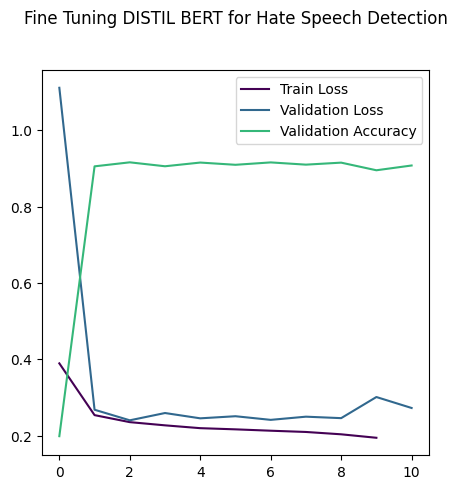

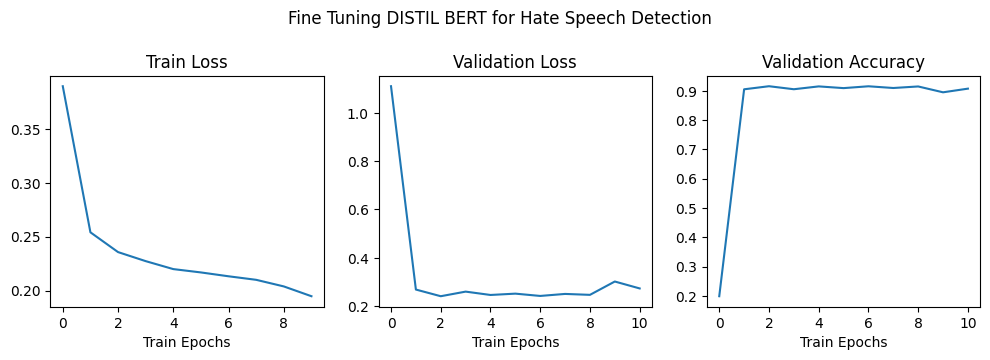

In [2]:
x_lim_loss = [0.8, epochs]
y_lim_loss = [0.19, 0.36]
x_lim_acc = [0.8, epochs]
y_lim_acc = [0.85, 0.95]

first_val_loss = []
first_val_acc = []
layers = ['Train Loss', 'Validation Loss', 'Validation Accuracy']

value = ['train_loss', 'val_loss', 'val_acc']
cmap = colormaps[cmp]
base_path = f"/rscratch/tpang/kinshuk/RpMKin/distilbert/results"
    
path = os.path.join(base_path, 'baseline.npy')

baseline = np.load(path, allow_pickle=True).item()
# cmap =  get_cmap(cmp, len(layers)))

plt.figure(figsize=(5,5))

for ix, method in enumerate(layers):
    plt.plot(baseline[value[ix]], label=method, c=cmap(ix/len(layers)))
    plt.title(f'Fine Tuning DISTIL BERT for Hate Speech Detection', fontsize=12, y=1.1)
    plt.legend(bbox_to_anchor=(1, 1))

plt.figure(figsize=(12, 3))
for l_idx, layer in enumerate(layers):

    plt.subplot(1, 3, 1)
    plt.plot(baseline['train_loss'])
    plt.xlabel('Train Epochs')
    plt.title('Train Loss')

    plt.subplot(1, 3, 2)
    plt.plot(baseline['val_loss'][:])
    plt.xlabel('Train Epochs')
    plt.title('Validation Loss')

    plt.subplot(1, 3, 3)
    plt.plot(baseline['val_acc'])
    plt.xlabel('Train Epochs')
    plt.title('Validation Accuracy')
    
    
    plt.suptitle(f'Fine Tuning DISTIL BERT for Hate Speech Detection', fontsize=12, y=1.1)
    
    break
    

    plt.subplot(1, 3, 1)
    plt.plot(baseline['train_loss'], label=f'Layers={layer}', c=cmap(l_idx/len(layers)))
    plt.xlabel('Train Epochs')
    plt.title('Train Loss')
    
    plt.subplot(1, 3, 2)
    plt.plot(baseline['val_loss'][:], label = f'Layers={layer}', c=cmap(l_idx/len(layers)))
    plt.xlim(x_lim_loss)
    plt.ylim(y_lim_loss)
    plt.title('Validation Loss')
    
    plt.subplot(1, 3, 3)
    plt.plot(baseline['val_acc'], label=f'Layers={layer}', c=cmap(l_idx/len(layers)))
    plt.xlabel('Train Epochs')
    plt.title('Validation Accuracy')
        
    plt.suptitle(f'Results of Training and Validation', fontsize=12, y=1.1)
    if sv:
        plt.savefig(f'{pth}/results.png', transparent=transparent, dpi=dpi, bbox_inches='tight')